In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [136]:
data = pd.read_csv('cancer_de_mama_sin_anaplastic.csv', sep=';')


In [137]:
data.head()

,Age,Race,Marital Status,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1.0,60.0,Alive
1,50,White,Married,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5.0,62.0,Alive
2,58,White,Divorced,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7.0,75.0,Alive
3,58,White,Married,Poorly differentiated,3,Regional,18.0,Positive,Positive,2.0,1.0,84.0,Alive
4,47,White,Married,Poorly differentiated,3,Regional,41.0,Positive,Positive,3.0,1.0,50.0,Alive


In [138]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'differentiate', 'Grade', 'A Stage',
       'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'Status'],
      dtype='object')

In [139]:
data.isna().sum()


Age                       0
Race                      0
Marital Status            0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [140]:
data.dtypes

Age                         int64
Race                       object
Marital Status             object
differentiate              object
Grade                       int64
A Stage                    object
Tumor Size                float64
Estrogen Status            object
Progesterone Status        object
Regional Node Examined    float64
Reginol Node Positive     float64
Survival Months           float64
Status                     object
dtype: object

In [141]:
data.dtypes

Age                         int64
Race                       object
Marital Status             object
differentiate              object
Grade                       int64
A Stage                    object
Tumor Size                float64
Estrogen Status            object
Progesterone Status        object
Regional Node Examined    float64
Reginol Node Positive     float64
Survival Months           float64
Status                     object
dtype: object

In [142]:
# Separar características (X) y variable dependiente (y)
data = data.drop(columns=['differentiate','A Stage','Estrogen Status','Progesterone Status'], axis=1)

In [143]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'Grade', 'Tumor Size',
       'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'Status'],
      dtype='object')

In [144]:
data.dtypes

Age                         int64
Race                       object
Marital Status             object
Grade                       int64
Tumor Size                float64
Regional Node Examined    float64
Reginol Node Positive     float64
Survival Months           float64
Status                     object
dtype: object

In [145]:
data.isna().sum()

Age                       0
Race                      0
Marital Status            0
Grade                     0
Tumor Size                0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [146]:
data.head()

,Age,Race,Marital Status,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,3,4.0,24.0,1.0,60.0,Alive
1,50,White,Married,2,35.0,14.0,5.0,62.0,Alive
2,58,White,Divorced,2,63.0,14.0,7.0,75.0,Alive
3,58,White,Married,3,18.0,2.0,1.0,84.0,Alive
4,47,White,Married,3,41.0,3.0,1.0,50.0,Alive


In [147]:
# Mapear valores categóricos a numéricos
data['Status'] = data['Status'].map({'Alive': 1, 'Dead': 0})

In [148]:
print(data.columns)

Index(['Age', 'Race', 'Marital Status', 'Grade', 'Tumor Size',
       'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'Status'],
      dtype='object')


Preprocesamiento de Datos

In [149]:
# Eliminar espacios en blanco alrededor de los valores
data['Race'] = data['Race'].str.strip()
data['Marital Status'] = data['Marital Status'].str.strip()

# Realizar codificación one-hot para todas las columnas categóricas
race_dummy = pd.get_dummies(data['Race'], prefix='Race')
marital_status_dummy = pd.get_dummies(data['Marital Status'], prefix='Marital_Status')
# Concatenar los DataFrames resultantes
data_encoded = pd.concat([data, race_dummy, marital_status_dummy], axis=1)

In [150]:
data_encoded

,Age,Race,Marital Status,Grade,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Black,Race_Other,Race_White,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Separated,Marital_Status_Single,Marital_Status_Widowed
0,68,White,Married,3,4.0,24.0,1.0,60.0,1,0,0,1,0,1,0,0,0
1,50,White,Married,2,35.0,14.0,5.0,62.0,1,0,0,1,0,1,0,0,0
2,58,White,Divorced,2,63.0,14.0,7.0,75.0,1,0,0,1,1,0,0,0,0
3,58,White,Married,3,18.0,2.0,1.0,84.0,1,0,0,1,0,1,0,0,0
4,47,White,Married,3,41.0,3.0,1.0,50.0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62,Other,Married,2,9.0,1.0,1.0,49.0,1,0,1,0,0,1,0,0,0
4001,56,White,Divorced,2,46.0,14.0,8.0,69.0,1,0,0,1,1,0,0,0,0
4002,68,White,Married,2,22.0,11.0,3.0,69.0,1,0,0,1,0,1,0,0,0
4003,58,Black,Divorced,2,44.0,11.0,1.0,72.0,1,1,0,0,1,0,0,0,0


In [151]:
# Eliminar las columnas originales categóricas
data_encoded.drop(['Race', 'Marital Status'], axis=1, inplace=True)

# Mostrar el DataFrame resultante
print(data_encoded)

      Age  Grade  Tumor Size  Regional Node Examined  Reginol Node Positive  \
0      68      3         4.0                    24.0                    1.0   
1      50      2        35.0                    14.0                    5.0   
2      58      2        63.0                    14.0                    7.0   
3      58      3        18.0                     2.0                    1.0   
4      47      3        41.0                     3.0                    1.0   
...   ...    ...         ...                     ...                    ...   
4000   62      2         9.0                     1.0                    1.0   
4001   56      2        46.0                    14.0                    8.0   
4002   68      2        22.0                    11.0                    3.0   
4003   58      2        44.0                    11.0                    1.0   
4004   46      2        30.0                     7.0                    2.0   

      Survival Months  Status  Race_Black  Race_Oth

In [152]:
data_encoded.columns

Index(['Age', 'Grade', 'Tumor Size', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status', 'Race_Black',
       'Race_Other', 'Race_White', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Separated',
       'Marital_Status_Single', 'Marital_Status_Widowed'],
      dtype='object')

In [153]:
data_encoded.dtypes

Age                           int64
Grade                         int64
Tumor Size                  float64
Regional Node Examined      float64
Reginol Node Positive       float64
Survival Months             float64
Status                        int64
Race_Black                    uint8
Race_Other                    uint8
Race_White                    uint8
Marital_Status_Divorced       uint8
Marital_Status_Married        uint8
Marital_Status_Separated      uint8
Marital_Status_Single         uint8
Marital_Status_Widowed        uint8
dtype: object

In [154]:
# Separar características (X) y variable dependiente (y)
X = data_encoded.drop('Status', axis=1)  # Características (X)
y = data['Status']  # Variable dependiente (y)

In [155]:
X.columns

Index(['Age', 'Grade', 'Tumor Size', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Race_Black', 'Race_Other',
       'Race_White', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Separated', 'Marital_Status_Single',
       'Marital_Status_Widowed'],
      dtype='object')

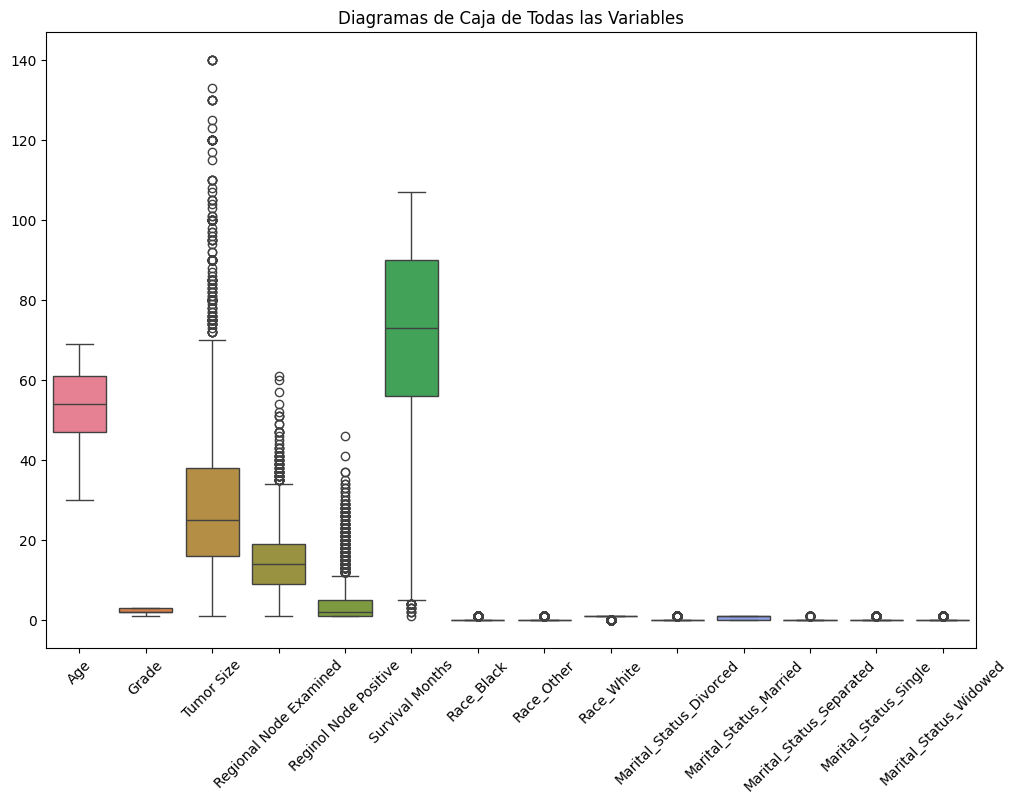

In [156]:
#Grafico de cajas

X = pd.DataFrame(X)

# Graficar diagramas de caja para todas las variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.title('Diagramas de Caja de Todas las Variables')
plt.show()

In [157]:
#Eliminacion de valores atipicos

# Calcular la media y la desviación estándar de la primera variable
mean1 = X['Tumor Size'].mean()
sd1 = X['Tumor Size'].std()

# Calcular los límites superior e inferior
lim_sup1 = mean1 + 3 * sd1
lim_inf1 = mean1 - 3 * sd1

# Filtrar filas que cumplen la condición para la variable
X = X[(X['Tumor Size'] < lim_sup1) & (X['Tumor Size'] > lim_inf1)]
############################################################



# Mostrar el nuevo conjunto de datos después de eliminar valores atípicos para la primera variable
print("Nuevo conjunto de datos después de eliminar valores atípicos para la seleccionada:")
data_k2 = pd.DataFrame(X)
print(data_k2.head())

Nuevo conjunto de datos después de eliminar valores atípicos para la seleccionada:
   Age  Grade  Tumor Size  Regional Node Examined  Reginol Node Positive  \
0   68      3         4.0                    24.0                    1.0   
1   50      2        35.0                    14.0                    5.0   
2   58      2        63.0                    14.0                    7.0   
3   58      3        18.0                     2.0                    1.0   
4   47      3        41.0                     3.0                    1.0   

   Survival Months  Race_Black  Race_Other  Race_White  \
0             60.0           0           0           1   
1             62.0           0           0           1   
2             75.0           0           0           1   
3             84.0           0           0           1   
4             50.0           0           0           1   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Separated  \
0                        0     

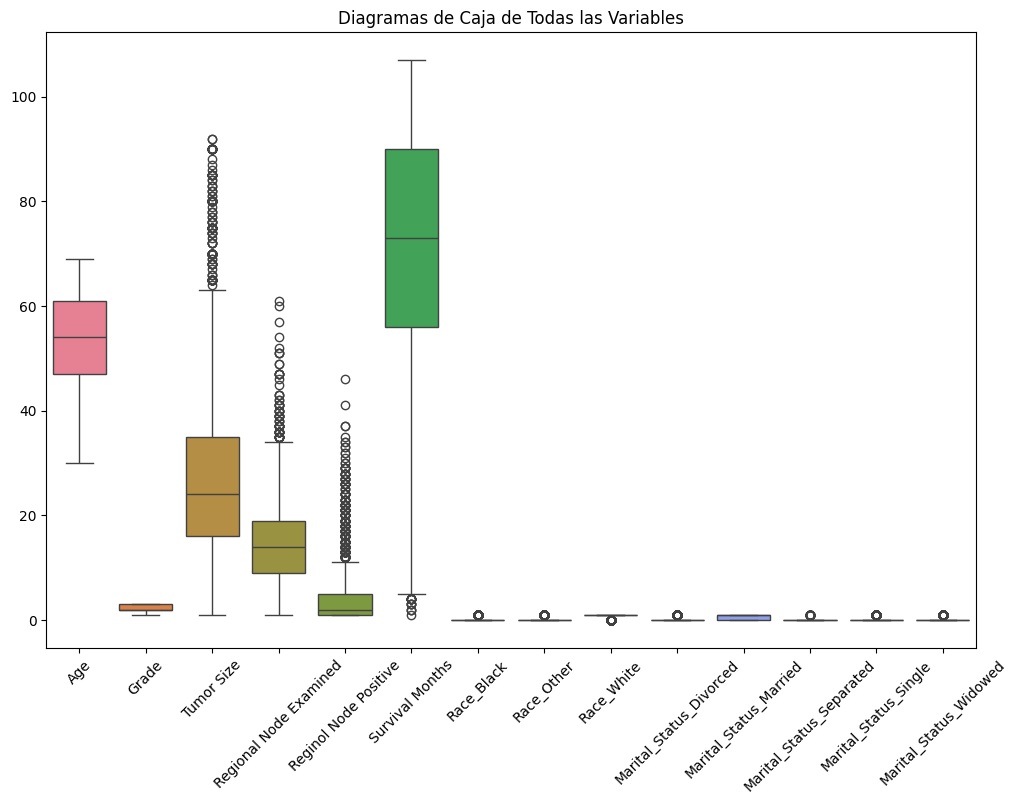

In [158]:
#GRAFICO DE CAJAS DESPUES DE Eliminacion de valores atipicos
# Graficar diagramas de caja para todas las variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_k2)
plt.xticks(rotation=45)
plt.title('Diagramas de Caja de Todas las Variables')
plt.show()

In [159]:
# Reajustar el conjunto de etiquetas para que coincida con el número de muestras en el conjunto de características
y = y[data_k2.index]

In [160]:
# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Método del codo para elegir el número de componentes principales
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)
num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1  # Elegir número de componentes para explicar el 95% de la varianza

# Reducir las características a los componentes seleccionados
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Partición de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Entrenar modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)

# Evaluar modelo Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred)
nb_recall = recall_score(y_test, nb_y_pred)
nb_f1 = f1_score(y_test, nb_y_pred)

# Entrenar modelo SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)


# Mostrar métricas
print("Métricas para modelo Naive Bayes:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)
print("\n")

Métricas para modelo Naive Bayes:
Accuracy: 0.8791348600508906
Precision: 0.9023383768913342
Recall: 0.9647058823529412
F1 Score: 0.9324804548685146




In [161]:
from sklearn.inspection import permutation_importance

# Calcular la importancia de las características mediante permutación
result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)

# Obtener los resultados y características más importantes
importance = result.importances_mean
features = X.columns

# Imprimir las características y su importancia
for i, feature in enumerate(features):
    print(f"{feature}: {importance[i]}")


Age: 0.0030534351145038
Grade: 0.00368956743002542
Tumor Size: 0.021374045801526687
Regional Node Examined: -0.002035623409669218
Reginol Node Positive: 0.0003816793893129611
Survival Months: 0.01959287531806615
Race_Black: -0.0012722646310432627
Race_Other: 0.014122137404580126
Race_White: 0.011450381679389299
Marital_Status_Divorced: -0.001399491094147587
Marital_Status_Married: 0.00012722646310431296


IndexError: index 11 is out of bounds for axis 0 with size 11

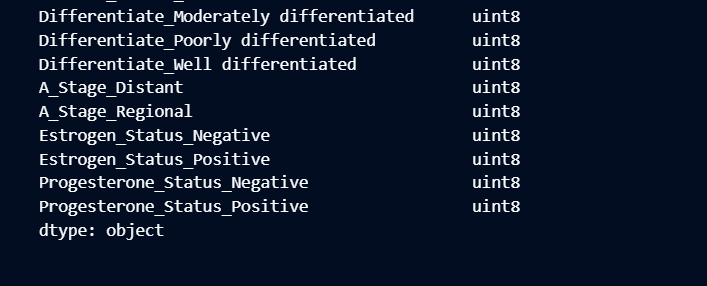